<a href="https://colab.research.google.com/github/carolinehaoud/MachineLearningPortfolio/blob/main/Week1_MachineLearningPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 1: Machine Learning Part 1 - Regression**



Machine learning (ML) is the study of computer programs which learn from experience rather than being explicitly programmed. ML algorithms can help us make predictions from data, understand complex datasets, and drive decision-making. Today, ML applications can be found everywhere, from self-driving cars like Teslas, to personal voice assistants like Alexa and Siri, to content recommendation systems as in Netflix and Spotify.

In this lesson, we will practice solving a common machine learning problem: regression. We will create and train regression models to learn from data and make predictions using a popular ML library called [Scikit-learn](https://scikit-learn.org/stable/).

<img src="https://www.besanttechnologies.com/wp-content/uploads/2019/12/applications-of-machine-learning.jpg" alt="drawing" width="600"/>

Before starting this notebook, please run the following cell to authenticate with your Google account and have access to the files (in Google Drive) for this lesson.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

## 1. What is regression?

Regression is the task of using input variables to predict a continuous-valued output (such as temperature, price, exam score, etc.). In machine learning, the inputs are often called **features** and the output is called the **label**. Some common examples of regression problems are:
- Google Maps: using distance and traffic conditions to estimate travel time
- NYC Subway: using a train's current location and speed to predict time of arrival
- Weather report: using atmospheric conditions to forecast temperature

While there are many kinds of models to solve regression problems, the most popular regression model by far is **linear regression**. Linear regression fits a line through your data, using the feature(s) to predict the label. The slope and intercept of this fitted line can then be used to predict the label for new data points which you do not have the label for.

In the figure below, we have a single feature x and a label y. The data points shown in blue are (x, y) pairs. The linear regression model, shown in red, fits a line to these data points. With this line, given a new value of x, we can predict the value of y.

<img src="https://miro.medium.com/max/640/1*LEmBCYAttxS6uI6rEyPLMQ.png" alt="drawing" width="600"/>

## 2. Regression example: predicting climate change in NYC

In this example, we will use linear regression to understand and forecast the effects of climate change on our city. We are given a dataset with two variables: year and AverageTemperature. Using this dataset, we will train a linear regression model to predict the AverageTemperature (the label) from the year (the feature). Then, we will see how close our predictions come to the actual values!

First, let's load a **training dataset** containing the average yearly temperatures from 1800 to 1949. These will be the datapoints we use to train our model.

In [ ]:
nyc_temp_train_df = pd.read_csv('/content/drive/MyDrive/data sci/NYC_yearly_temp_train.csv')
nyc_temp_train_df

,year,AverageTemperature
0,1800,9.577167
1,1801,9.999917
2,1802,10.285667
3,1803,10.071250
4,1804,9.685833
...,...,...
138,1945,9.942833
139,1946,10.631083
140,1947,9.907000
141,1948,9.826000


### Exercise: Celsius to Fahrenheit

The AverageTemperature column lists temperatures in degrees Celsius. Convert this column to Fahrenheit using the following formula:

$F = C \cdot \frac{9}{5} + 32$

In [ ]:
### Your code here
nyc_temp_train_df['AverageTemperature'] = nyc_temp_train_df['AverageTemperature']*(9/5)+32
nyc_temp_train_df


,year,AverageTemperature
0,1800,49.23890
1,1801,49.99985
2,1802,50.51420
3,1803,50.12825
4,1804,49.43450
...,...,...
138,1945,49.89710
139,1946,51.13595
140,1947,49.83260
141,1948,49.68680


### Exercise: Plot average temperatures over the years

Before training an ML model, it's always a good idea to explore and visualize the data you are working with. Use a scatter plot (`plt.scatter()` in matplotlib) to visualize the average temperatures over the years in NYC.

In [ ]:
### Your code here
plt.scatter(nyc_temp_train_df['year'], nyc_temp_train_df['AverageTemperature'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (F)', fontsize=12)


NameError: ignored

We can see from the plot that there is a clear upward trend in the yearly average temperatures. So, let's train a linear regression model to fit this data using the *LinearRegression* class in scikit-learn.

In [ ]:
model = LinearRegression()                            # Initialize LinearRegression model
model.fit(X=nyc_temp_train_df[['year']],              # Train model on the data
          y=nyc_temp_train_df['AverageTemperature'])

LinearRegression()

Now, we can use this trained model to make predictions of the average temperature for each year in our training set (1800 - 1949).

In [ ]:
temp_predictions_train = model.predict(X=nyc_temp_train_df[['year']])
temp_predictions_train

array([48.3271371 , 48.33576592, 48.34439475, 48.35302357, 48.36165239,
       48.37028122, 48.37891004, 48.38753886, 48.39616769, 48.40479651,
       48.41342533, 48.42205416, 48.4393118 , 48.44794062, 48.45656945,
       48.48245592, 48.49108474, 48.49971356, 48.50834239, 48.51697121,
       48.52560003, 48.53422886, 48.54285768, 48.5514865 , 48.56011533,
       48.56874415, 48.57737297, 48.5860018 , 48.59463062, 48.60325944,
       48.61188826, 48.62051709, 48.62914591, 48.64640356, 48.65503238,
       48.6636612 , 48.67229003, 48.68091885, 48.68954767, 48.6981765 ,
       48.70680532, 48.71543414, 48.72406297, 48.73269179, 48.74132061,
       48.74994943, 48.75857826, 48.76720708, 48.7758359 , 48.78446473,
       48.79309355, 48.80172237, 48.8103512 , 48.81898002, 48.82760884,
       48.83623767, 48.84486649, 48.85349531, 48.86212414, 48.87075296,
       48.87938178, 48.8880106 , 48.89663943, 48.90526825, 48.9225259 ,
       48.93115472, 48.93978354, 48.94841237, 48.95704119, 48.96

We can plot these predictions (in red) along with the actual temperature values (in blue) to see how close our model's predictions are to the actual values. Note that the predictions are in a straight line since this is a linear regression model.

How well do you think our model's predictions compare to the actual temperatures? Did it do a good job?

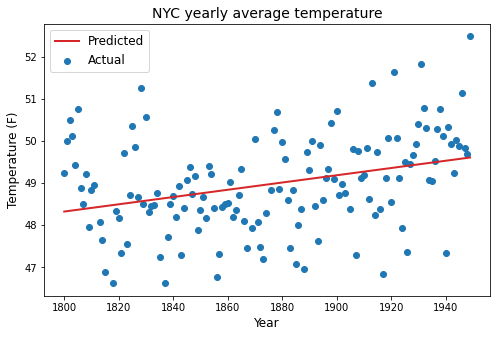

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(nyc_temp_train_df['year'], nyc_temp_train_df['AverageTemperature'], label='Actual')
plt.plot(nyc_temp_train_df['year'], temp_predictions_train, label='Predicted',
         color='tab:red', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (F)', fontsize=12)
plt.title('NYC yearly average temperature', fontsize=14)
plt.legend(fontsize=12)

While it's nice to make predictions on our training dataset, the real value of machine learning comes from being able to make predictions on new, unseen examples. So, let's use this trained model to make predictions on a **test dataset**: the years from 1950 to 2030. These are years which our model has not seen during training, so we would like to see how well it can generalize to these new examples.

First, create a 81x1 dimensional numpy array for the 81 years between 1950 and 2030. This will be the feature for our test dataset.

In [ ]:
years_test = np.array(list(range(1950, 2031))).reshape(81, 1)
years_test

array([[1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [20

Now, use the trained model to make temperature predictions on these new years in our test dataset.

In [ ]:
temp_predictions_test = model.predict(years_test)
temp_predictions_test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([49.62146057, 49.63008939, 49.63871822, 49.64734704, 49.65597586,
       49.66460469, 49.67323351, 49.68186233, 49.69049116, 49.69911998,
       49.7077488 , 49.71637763, 49.72500645, 49.73363527, 49.7422641 ,
       49.75089292, 49.75952174, 49.76815056, 49.77677939, 49.78540821,
       49.79403703, 49.80266586, 49.81129468, 49.8199235 , 49.82855233,
       49.83718115, 49.84580997, 49.8544388 , 49.86306762, 49.87169644,
       49.88032527, 49.88895409, 49.89758291, 49.90621174, 49.91484056,
       49.92346938, 49.9320982 , 49.94072703, 49.94935585, 49.95798467,
       49.9666135 , 49.97524232, 49.98387114, 49.99249997, 50.00112879,
       50.00975761, 50.01838644, 50.02701526, 50.03564408, 50.04427291,
       50.05290173, 50.06153055, 50.07015937, 50.0787882 , 50.08741702,
       50.09604584, 50.10467467, 50.11330349, 50.12193231, 50.13056114,
       50.13918996, 50.14781878, 50.15644761, 50.16507643, 50.17370525,
       50.18233408, 50.1909629 , 50.19959172, 50.20822054, 50.21

Let's plot the predictions for these new test dataset years, along with the training dataset predictions and actual temperatures from before. This lets us forecast yearly temperatures in NYC into the future, as far as 2030!

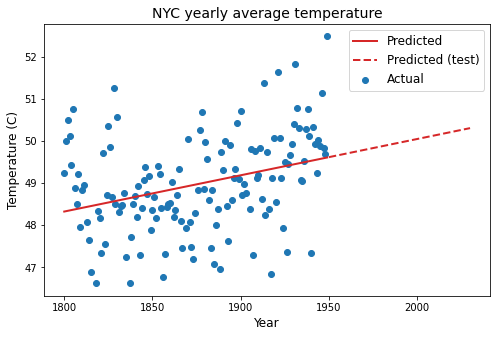

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(nyc_temp_train_df['year'], nyc_temp_train_df['AverageTemperature'], label='Actual')
plt.plot(nyc_temp_train_df['year'], temp_predictions_train, label='Predicted',
         color='tab:red', linewidth=2)
plt.plot(years_test, temp_predictions_test, label='Predicted (test)',
        linestyle='--', color='tab:red', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (C)', fontsize=12)
plt.title('NYC yearly average temperature', fontsize=14)
plt.legend(fontsize=12)

How do we know if our test set predictions are any good? Luckily, we also have a dataset with the actual AverageTemperature labels for the years 1950 - 2013. Let's load in this dataset.

In [ ]:
nyc_temp_test_df = pd.read_csv('/content/drive/MyDrive/data sci/Copy of NYC_yearly_temp_test.csv')
# Remembering to convert the test set temperatures into Fahrenheit!
nyc_temp_test_df['AverageTemperature'] = nyc_temp_test_df['AverageTemperature'] * (9/5) + 32
nyc_temp_test_df

,year,AverageTemperature
0,1950,49.50365
1,1951,50.49380
2,1952,50.94065
3,1953,52.11410
4,1954,50.55560
...,...,...
59,2009,50.25530
60,2010,52.44365
61,2011,52.29005
62,2012,53.54870


Now, let's add in the test dataset actual labels to our plot. How well do you think our test set predictions (red dotted line) compare against the actual test set labels (light blue points)?

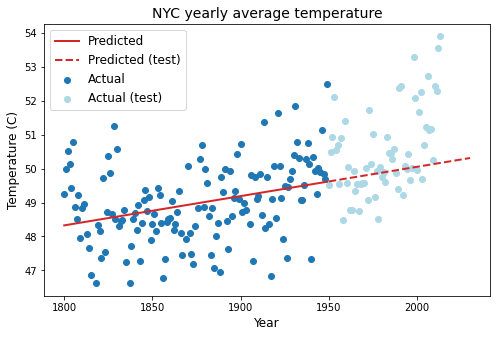

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(nyc_temp_train_df['year'], nyc_temp_train_df['AverageTemperature'], label='Actual')
plt.plot(nyc_temp_train_df['year'], temp_predictions_train, label='Predicted',
         color='tab:red', linewidth=2)
plt.scatter(nyc_temp_test_df['year'], nyc_temp_test_df['AverageTemperature'], label='Actual (test)',
            color='lightblue')
plt.plot(years_test, temp_predictions_test, label='Predicted (test)',
        linestyle='--', color='tab:red', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (C)', fontsize=12)
plt.title('NYC yearly average temperature', fontsize=14)
plt.legend(fontsize=12)

## 3. Your turn: predicting bicycle traffic on Brooklyn Bridge!

<img src="https://media.tacdn.com/media/attractions-splice-spp-674x446/09/de/33/d1.jpg" alt="drawing" width="600"/>

Now, you will train a linear regression model to predict bicycle traffic from temperature. You are given a dataset containing the daily temperature and number of bicycles crossing Brooklyn Bridge. Let's load in this training data.

In [ ]:
bike_train_df = pd.read_csv('/content/drive/MyDrive/data sci/Copy of brooklyn_bridge_bicycles_train.csv')
bike_train_df

,Date,Temperature,Number of bicycles
0,2016-04-01 00:00:00,78.1,1704.0
1,2016-04-02 00:00:00,55.0,827.0
2,2016-04-04 00:00:00,44.1,521.0
3,2016-04-05 00:00:00,42.1,1416.0
4,2016-04-06 00:00:00,45.0,1885.0
5,2016-04-07 00:00:00,57.0,1276.0
6,2016-04-08 00:00:00,46.9,1982.0
7,2016-04-09 00:00:00,43.0,504.0
8,2016-04-10 00:00:00,48.9,1447.0
9,2016-04-13 00:00:00,57.0,2840.0


Again, it's always a good idea to visualize your data before training a model. Use a scatter plot to plot the number of bicycles vs temperature.

Text(0.5, 1.0, 'Number of bicycles over Brooklyn Bridge')

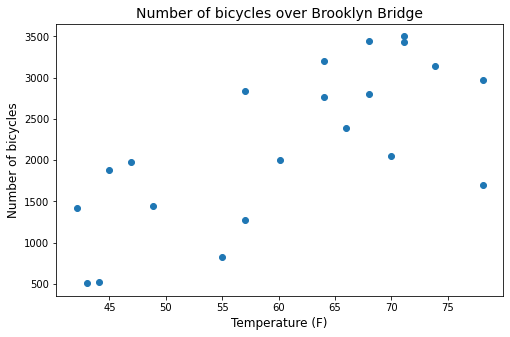

In [ ]:


plt.figure(figsize=(8, 5))

plt.scatter (bike_train_df[['Temperature']], bike_train_df['Number of bicycles'])
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Number of bicycles', fontsize=12)
plt.title('Number of bicycles over Brooklyn Bridge', fontsize=14)

Train a linear regression model in sklearn to predict number of bicycles from temperature.

In [ ]:


model = LinearRegression()

model.fit(bike_train_df[['Temperature']], bike_train_df['Number of bicycles'])

LinearRegression()

Use your trained model to make predictions on the training data.

In [ ]:
### Your code here

### TODO: fill in the line below
bike_predictions_train = model.predict(bike_train_df[['Temperature']])
bike_predictions_train

array([3197.77751825, 1879.60970132, 1257.61709506, 1143.49001135,
       1308.97428273, 1993.73678504, 1417.39501227, 1194.84719902,
       1531.52209598, 1993.73678504, 2393.18157804, 2507.30866176,
       2958.11064244, 2798.33272524, 2621.43574548, 2798.33272524,
       3197.77751825, 2735.56282919, 2621.43574548, 2170.6337648 ,
       2393.18157804])

Let's plot our model's predictions (red line) along with the actual data points (blue).

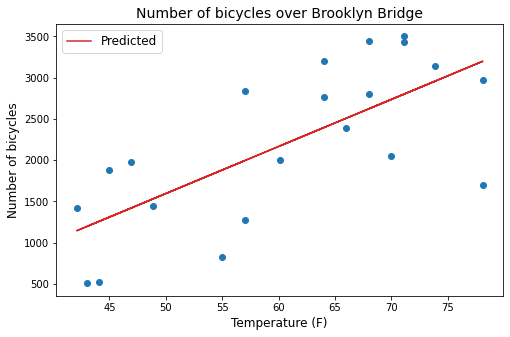

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(bike_train_df['Temperature'], bike_train_df['Number of bicycles'])
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Number of bicycles', fontsize=12)
plt.title('Number of bicycles over Brooklyn Bridge', fontsize=14)

plt.plot(bike_train_df['Temperature'], bike_predictions_train, label='Predicted', color='tab:red')
plt.legend(fontsize=12)

Finally, let's load in a test dataset to make predictions on data points that our model has not seen before.

In [ ]:
bike_test_df = pd.read_csv('/content/drive/MyDrive/data sci/Copy of brooklyn_bridge_bicycles_test.csv')
bike_test_df

,Date,Temperature,Number of bicycles
0,2016-04-03 00:00:00,39.9,526.0
1,2016-04-11 00:00:00,62.1,2005.0
2,2016-04-12 00:00:00,57.0,1045.0
3,2016-04-14 00:00:00,62.1,2861.0
4,2016-04-18 00:00:00,81.0,3871.0
5,2016-04-25 00:00:00,66.9,3463.0
6,2016-04-27 00:00:00,62.1,3343.0
7,2016-04-28 00:00:00,57.9,2486.0
8,2016-04-29 00:00:00,57.0,2375.0


Use your trained model to make predictions on the test set temperatures.

In [ ]:
### Your code here

# TODO: fill in the line below
bike_predictions_test = model.predict(X=bike_test_df[['Temperature']])
bike_predictions_test

array([1017.95021926, 2284.76084851, 1993.73678504, 2284.76084851,
       3363.26178964, 2558.66584943, 2284.76084851, 2045.09397271,
       1993.73678504])

We can compare our predictions against the true values to see how well the model did! What do you think?

In [ ]:
bike_test_df['Number of bicycles (predicted)'] = bike_predictions_test
bike_test_df

,Date,Temperature,Number of bicycles,Number of bicycles (predicted)
0,2016-04-03 00:00:00,39.9,526.0,1017.950219
1,2016-04-11 00:00:00,62.1,2005.0,2284.760849
2,2016-04-12 00:00:00,57.0,1045.0,1993.736785
3,2016-04-14 00:00:00,62.1,2861.0,2284.760849
4,2016-04-18 00:00:00,81.0,3871.0,3363.261790
5,2016-04-25 00:00:00,66.9,3463.0,2558.665849
6,2016-04-27 00:00:00,62.1,3343.0,2284.760849
7,2016-04-28 00:00:00,57.9,2486.0,2045.093973
8,2016-04-29 00:00:00,57.0,2375.0,1993.736785
